# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.feature_selection import mutual_info_classif
from sklearn.decomposition import PCA
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Clustering Classification/Dataset_clustering.csv")
df.head()

df_original = df.copy()

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

##1. Memahami Struktur Data

In [3]:
# Struktur Data
print("Shape:", df.shape)
print("\nInfo:")
print(df.info())

Shape: (9800, 18)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-nul

##2. Menangani Data yang Hilang

In [4]:
# Cek Missing Value
print("Shape:", df.shape)
print("\nInfo:")
print(df.info())


Shape: (9800, 18)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-nul

##3. Analisis Distribusi dan Korelasi

In [5]:
print(f"Jumlah baris: {df_original.shape[0]}, Jumlah kolom: {df_original.shape[1]}")
print(df_original.info())

df_original['Order Date'] = pd.to_datetime(df_original['Order Date'], format='%d/%m/%Y')
df_original['Ship Date'] = pd.to_datetime(df_original['Ship Date'], format='%d/%m/%Y')

df_original['Lead Time'] = (df_original['Ship Date'] - df_original['Order Date']).dt.days

print(df_original.describe())

Jumlah baris: 9800, Jumlah kolom: 18
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          

##4. Visualisasi Data

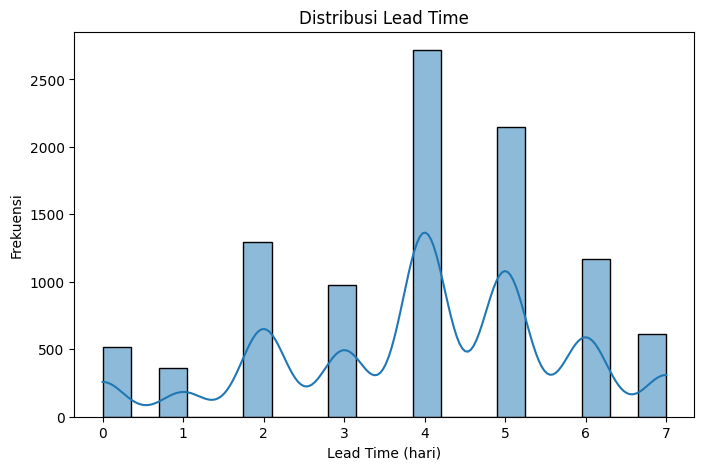

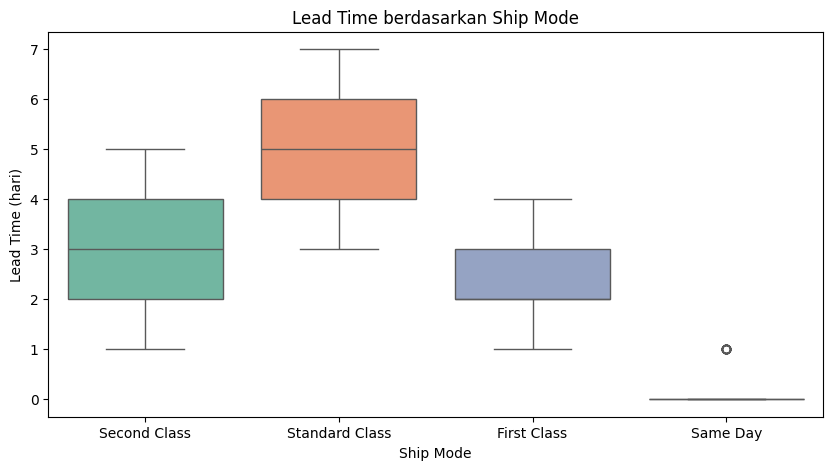

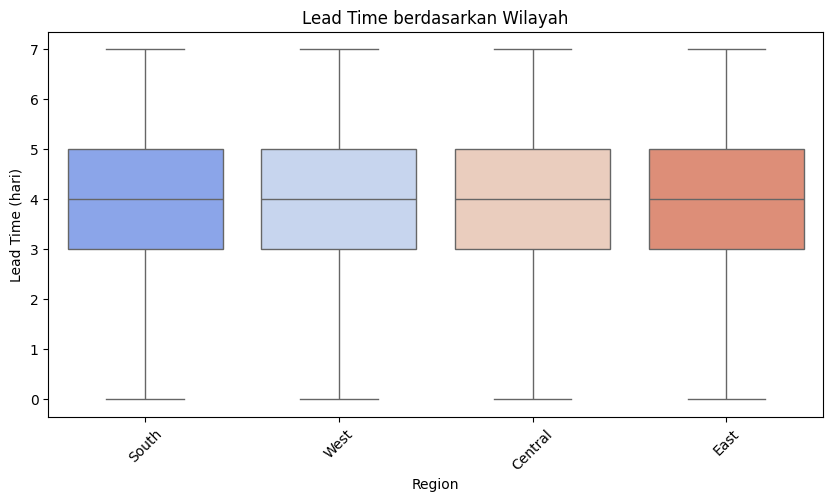

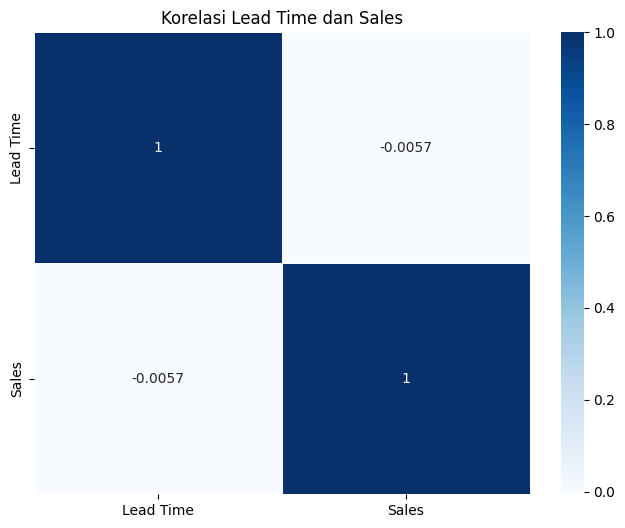

In [6]:
plt.figure(figsize=(8, 5))
sns.histplot(df_original['Lead Time'], bins=20, kde=True)
plt.title("Distribusi Lead Time")
plt.xlabel("Lead Time (hari)")
plt.ylabel("Frekuensi")
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x="Ship Mode", y="Lead Time", hue="Ship Mode", data=df_original, palette="Set2")
plt.title("Lead Time berdasarkan Ship Mode")
plt.xlabel("Ship Mode")
plt.ylabel("Lead Time (hari)")
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x="Region", y="Lead Time", data=df_original, hue="Region", palette="coolwarm")
plt.title("Lead Time berdasarkan Wilayah")
plt.xlabel("Region")
plt.ylabel("Lead Time (hari)")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(8, 6))
sns.heatmap(df_original[['Lead Time', 'Sales']].corr(), annot=True, cmap="Blues", linewidths=0.5)
plt.title("Korelasi Lead Time dan Sales")
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

Original data shape: (9800, 19)
After dropping NA: (9789, 19)
Duplicate rows before removal: 0
After removing duplicates: (9789, 19)
After outlier removal: (8648, 19)
Final feature matrix shape: (8648, 3)
Dataframe length: 8648
Dataset setelah pembersihan dan transformasi:
   Row ID        Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0       1  CA-2017-152156 2017-11-08 2017-11-11    Second Class    CG-12520   
1       2  CA-2017-152156 2017-11-08 2017-11-11    Second Class    CG-12520   
2       3  CA-2017-138688 2017-06-12 2017-06-16    Second Class    DV-13045   
3       4  US-2016-108966 2016-10-11 2016-10-18  Standard Class    SO-20335   
4       5  US-2016-108966 2016-10-11 2016-10-18  Standard Class    SO-20335   

     Customer Name    Segment        Country             City       State  \
0      Claire Gute   Consumer  United States        Henderson    Kentucky   
1      Claire Gute   Consumer  United States        Henderson    Kentucky   
2  Darrin Van Huff  

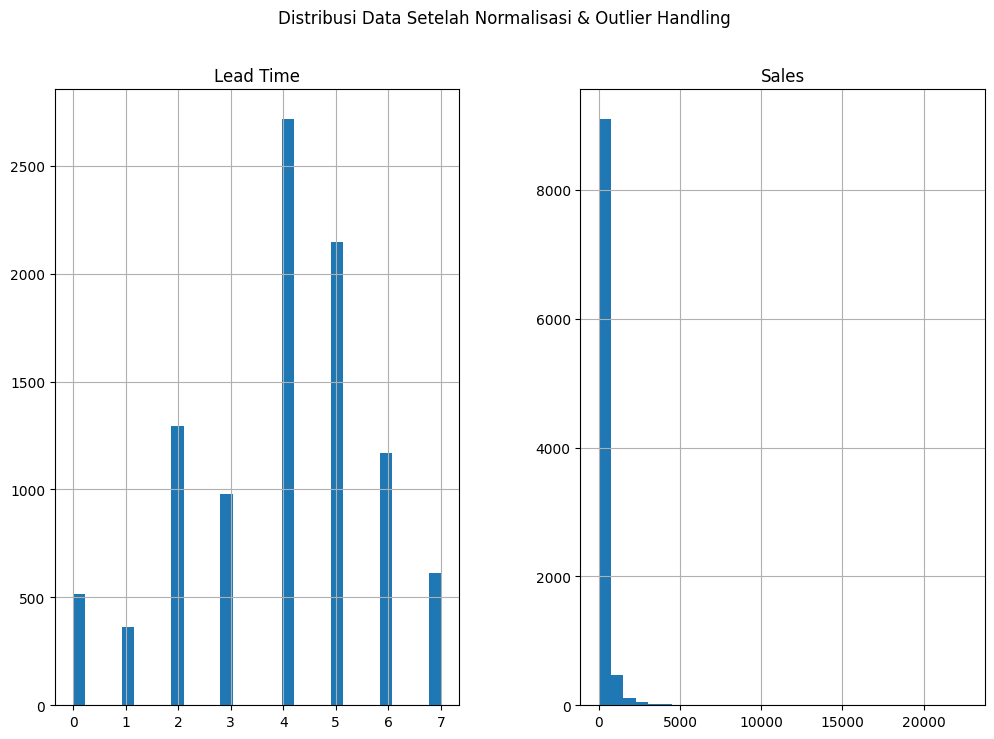

In [7]:
# 1. Handle Missing Values
print(f"Original data shape: {df_original.shape}")
df_clean = df_original.dropna().copy()
print(f"After dropping NA: {df_clean.shape}")

# 2. Remove Duplicates
print(f"Duplicate rows before removal: {df_clean.duplicated().sum()}")
df_clean = df_clean.drop_duplicates()
print(f"After removing duplicates: {df_clean.shape}")

# 3. Outlier Handling
numerical_columns = ['Lead Time', 'Sales']

# Calculate bounds using IQR method
Q1 = df_clean[numerical_columns].quantile(0.25)
Q3 = df_clean[numerical_columns].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter outliers
mask = ~((df_clean[numerical_columns] < lower_bound) |
         (df_clean[numerical_columns] > upper_bound)).any(axis=1)
df_clean = df_clean[mask]
print(f"After outlier removal: {df_clean.shape}")

# Feature Engineering
# ------------------

# 1. Normalize numerical features
scaler = MinMaxScaler()
df_clean[numerical_columns] = scaler.fit_transform(df_clean[numerical_columns])

# 2. Encode categorical features
label_encoder = LabelEncoder()
categorical_columns = ['Ship Mode', 'Region', 'Segment', 'Category', 'Sub-Category']
for col in categorical_columns:
    df_clean[col] = label_encoder.fit_transform(df_clean[col])

# 3. Create binned feature
df_clean['Lead Time Binned'] = pd.qcut(
    df_clean['Lead Time'],
    q=2,
    labels=['Fast', 'Slow']
)
df_clean['Lead Time Binned'] = label_encoder.fit_transform(df_clean['Lead Time Binned'])
df_original['Lead Time Binned'] = df_clean['Lead Time Binned']

# Clustering Preparation
# ----------------------

# Select features for clustering
features_for_clustering = ['Ship Mode', 'Lead Time', 'Region']
X = df_clean[features_for_clustering]

# Standardize features
X_scaled = StandardScaler().fit_transform(X)

# Verify dimensions match
print(f"Final feature matrix shape: {X_scaled.shape}")
print(f"Dataframe length: {len(df_clean)}")

# Tampilkan hasil akhir
print("Dataset setelah pembersihan dan transformasi:")
print(df_original.head())

# Plot distribusi data numerik
df_original[numerical_columns].hist(figsize=(12, 8), bins=30)
plt.suptitle("Distribusi Data Setelah Normalisasi & Outlier Handling")
plt.show()

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

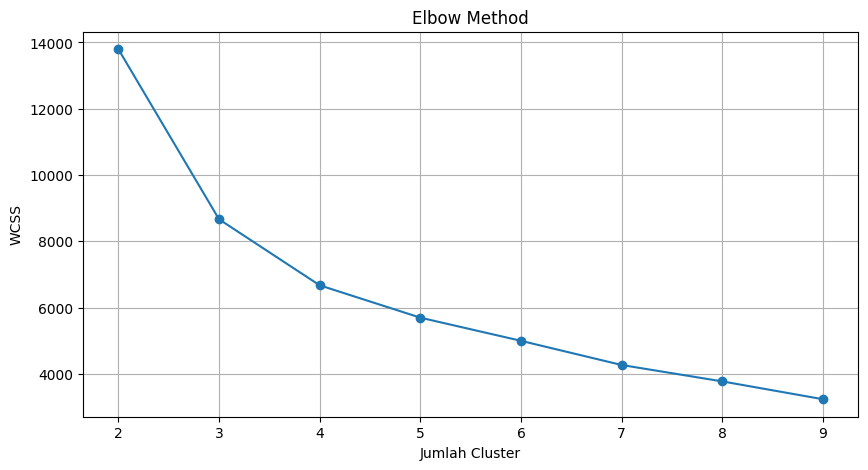

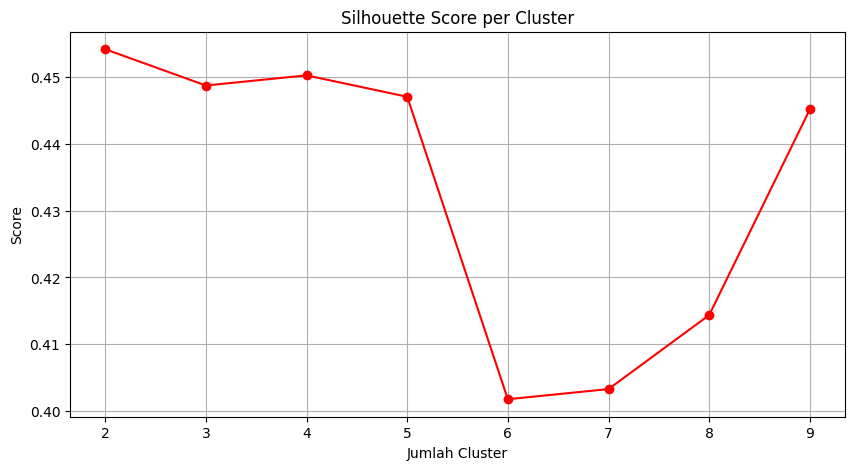

Silhouette Score for k=2: 0.4542
Silhouette Score for k=3: 0.4488
Silhouette Score for k=4: 0.4503
Silhouette Score for k=5: 0.4471
Silhouette Score for k=6: 0.4018
Silhouette Score for k=7: 0.4033
Silhouette Score for k=8: 0.4144
Silhouette Score for k=9: 0.4452

Optimal number of clusters (based on silhouette): 2

Cluster Distribution:
Cluster
2    3395
0    2891
1    2362
Name: count, dtype: int64


In [8]:
wcss = []
silhouette_scores = []

k_range = range(2, 10)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# Plot Elbow
plt.figure(figsize=(10, 5))
plt.plot(k_range, wcss, marker='o')
plt.title("Elbow Method")
plt.xlabel("Jumlah Cluster")
plt.ylabel("WCSS")
plt.grid(True)
plt.xticks(k_range)
plt.show()

# Plot Silhouette
plt.figure(figsize=(10, 5))
plt.plot(k_range, silhouette_scores, marker='o', color='red')
plt.title("Silhouette Score per Cluster")
plt.xlabel("Jumlah Cluster")
plt.ylabel("Score")
plt.grid(True)
plt.xticks(k_range)
plt.show()

# Optional: Cetak nilai Silhouette Score untuk referensi
for k, score in zip(k_range, silhouette_scores):
    print(f"Silhouette Score for k={k}: {score:.4f}")

# Tentukan k optimal secara manual atau otomatis (misal: max silhouette)
optimal_k = k_range[silhouette_scores.index(max(silhouette_scores))]
print(f"\nOptimal number of clusters (based on silhouette): {optimal_k}")

# Final Clustering
kmeans_final = KMeans(n_clusters=3, random_state=42, n_init=10)
df_clustered = df_clean.copy()
df_clustered['Cluster'] = kmeans_final.fit_predict(X_scaled)

# Distribusi cluster
print("\nCluster Distribution:")
print(df_clustered['Cluster'].value_counts())

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.


Feature Importance by Mutual Information:


,Feature,MI Score
2,Region,0.008097
1,Lead Time,0.004461
0,Ship Mode,0.000000


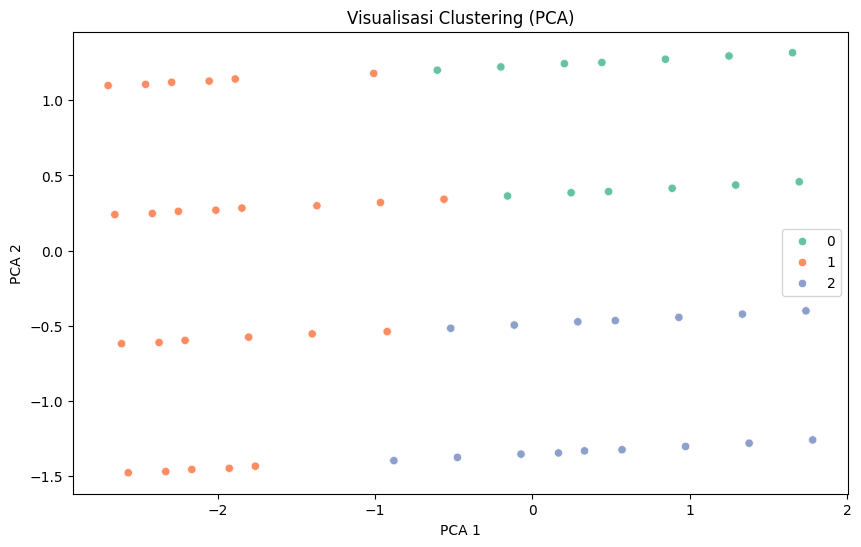

        Row ID                                   Ship Mode                   \
         count    mean  median     std min   max     count mean median  std   
Cluster                                                                       
0         2891 5003.00 5001.00 2797.88   3  9786      2891 2.85   3.00 0.35   
1         2362 4861.81 4881.50 2859.32   1  9787      2362 0.68   0.00 0.83   
2         3395 4873.36 4831.00 2834.47  15  9800      3395 2.80   3.00 0.40   

         ... Lead Time                Lead Time Binned                       \
         ...    median  std  min  max            count mean median  std min   
Cluster  ...                                                                  
0        ...      0.71 0.15 0.43 1.00             2891 0.58   1.00 0.49   0   
1        ...      0.29 0.15 0.00 0.57             2362 0.00   0.00 0.00   0   
2        ...      0.71 0.16 0.29 1.00             3395 0.53   1.00 0.50   0   

             
        max  
Cluster      
0       

In [9]:
common_indices = df_clustered.index.intersection(pd.RangeIndex(len(X_scaled)))
X_scaled_filtered = X_scaled[common_indices]
cluster_labels_filtered = df_clustered.loc[common_indices, 'Cluster']

mi_scores = mutual_info_classif(X_scaled_filtered, cluster_labels_filtered)
mi_df = pd.DataFrame({'Feature': features_for_clustering, 'MI Score': mi_scores})
mi_df = mi_df.sort_values(by='MI Score', ascending=False)
print("\nFeature Importance by Mutual Information:")
display(mi_df)


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df_clustered['Cluster'], palette='Set2')
plt.title("Visualisasi Clustering (PCA)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend()
plt.show()


df_numeric = df_clustered.select_dtypes(include=np.number)
cluster_summary = df_numeric.groupby('Cluster').agg(['count', 'mean', 'median', 'std', 'min', 'max'])
pd.set_option("display.float_format", "{:.2f}".format)
print(cluster_summary)


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [10]:
# # Ambil 3 fitur teratas
# top_features = mi_df['Feature'].head(3).tolist()
# print("Top 3 Features berdasarkan Mutual Information:", top_features)

# # 1. First ensure features matches X_scaled dimensions
# print(f"X_scaled shape: {X_scaled.shape}")
# print(f"Features length: {len(top_features)}")

# # 2. Create DataFrame with correct dimensions
# X_kbest = pd.DataFrame(X_scaled, columns=top_features)

# # 3. Now select top features
# X_kbest = X_kbest[top_features]
# selector = SelectKBest(mutual_info_classif, k=3)
# X_new = selector.fit_transform(X_scaled, df_clustered['Cluster'])

# # 4. Create subset DataFrame correctly
# X_kbest = pd.DataFrame(X_scaled, columns=top_features)[top_features]
# print(f"Final shape: {X_kbest.shape}")

# # Lakukan clustering ulang pada X_selected
# X_top_selected = df_clustered[top_features]

# # Clustering dengan fitur terbaik
# model_kmeans_top = KMeans(n_clusters=3, random_state=42, n_init=10)
# clusters_top = model_kmeans_top.fit_predict(X_top_selected)

# # Evaluasi hasil clustering
# score_top = silhouette_score(X_top_selected, clusters_top)

# # Tambahkan hasil cluster ke dataframe
# df_clustered['Cluster_TopFeatures'] = clusters_top

# # Output hasil
# print("Top Picked Features:", top_features)
# print("Silhouette Score with Top Picked Features:", score_top)
# print("Cluster Distribution:")
# print(df_clustered['Cluster_TopFeatures'].value_counts())

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

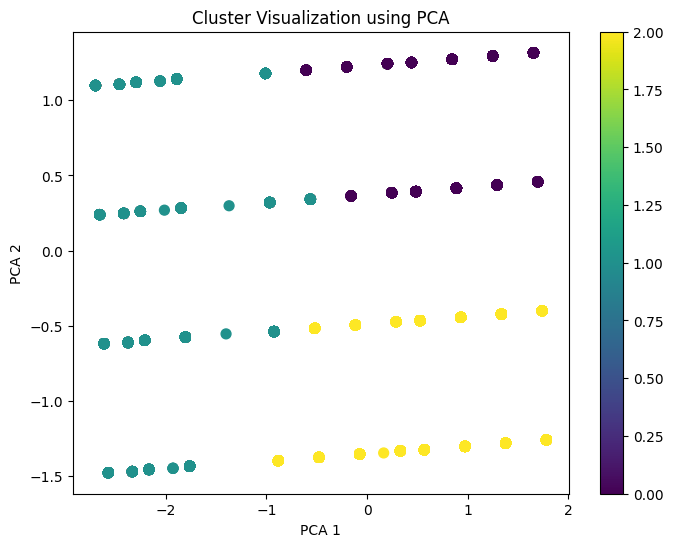

In [11]:
# Reduce ke 2 dimensi
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(X_scaled)

# Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(reduced_data)

# Visualisasi
plt.figure(figsize=(8,6))
plt.scatter(reduced_data[:,0], reduced_data[:,1], c=clusters, cmap='viridis', s=50)
plt.title('Cluster Visualization using PCA')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar()
plt.show()


## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [12]:
# Menambahkan cluster ke data asli
df_original['Cluster'] = df_clustered['Cluster']
df_original.groupby('Cluster').describe()

Row ID                                                        \
          count    mean   min     25%     50%     75%     max     std   
Cluster                                                                 
0.00    2891.00 5003.00  3.00 2656.50 5001.00 7421.00 9786.00 2797.88   
1.00    2362.00 4861.81  1.00 2286.75 4881.50 7339.50 9787.00 2859.32   
2.00    3395.00 4873.36 15.00 2419.00 4831.00 7315.50 9800.00 2834.47   

        Order Date                                 ... Lead Time       \
             count                           mean  ...       max  std   
Cluster                                            ...                  
0.00          2891  2017-04-16 17:45:25.838810112  ...      7.00 1.04   
1.00          2362  2017-05-31 17:23:43.539373568  ...      4.00 1.05   
2.00          3395  2017-04-29 17:08:34.285714432  ...      7.00 1.15   

        Lead Time Binned                                     
                   count mean  min  25%  50%  75%  max  std  
Cluster                                                      
0.00             2891.00 0.58 0.00 0.00 1.00 1.00 1.00 0.49  
1.00             2362.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00  
2.00             3395.00 0.53 0.00 0.00 1.00 1.00 1.00 0.50  

[3 rows x 56 columns]

In [13]:
# Agregasi untuk fitur numerik yang dipilih
numeric_cols_selected = ['Lead Time', 'Sales']
numeric_agg = df_original.groupby('Cluster')[numeric_cols_selected].agg(['min', 'mean', 'max'])

# Agregasi untuk fitur kategorikal yang dipilih
categorical_cols_selected = ['Ship Mode', 'Region', 'Lead Time Binned']
categorical_agg = df_original.groupby('Cluster')[categorical_cols_selected].agg(lambda x: x.mode()[0])

# Menampilkan hasil dengan format yang lebih baik
print("🔢 Agregasi Fitur Numerik (Selected Columns):")
display(numeric_agg.style.format({
    ('Lead Time', 'min'): '{:.1f}',
    ('Lead Time', 'mean'): '{:.1f}',
    ('Lead Time', 'max'): '{:.1f}',
    ('Sales', 'min'): '${:,.2f}',
    ('Sales', 'mean'): '${:,.2f}',
    ('Sales', 'max'): '${:,.2f}'
}))

print("\n🔤 Agregasi Fitur Kategorikal (Selected Columns):")
display(categorical_agg)

🔢 Agregasi Fitur Numerik (Selected Columns):



🔤 Agregasi Fitur Kategorikal (Selected Columns):


,Ship Mode,Region,Lead Time Binned
Cluster,,,
0.00,Standard Class,West,1.00
1.00,First Class,West,0.00
2.00,Standard Class,East,1.00



# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Agregasi Fitur Numerik:

## Cluster 0:
- **Lead Time:** 4.9
- **Sales:** 94.29
- **Analisis:** Cluster ini menunjukkan rata-rata waktu pengiriman yang cukup tinggi dengan penjualan rata-rata sedang namun terdapat outlier dengan penjualan tinggi. Hal ini menandakan keberagaman dalam segmen pelanggan, dari pembeli kecil hingga besar, serta kemungkinan adanya pembelian dalam jumlah besar atau satuan produk bernilai tinggi.
## Cluster 1:
- **Lead Time:** 1.7
- **Sales:** 94.88
- **Analisis:** Waktu pengiriman yang paling cepat di antara semua cluster, menunjukkan efisiensi logistik atau kebutuhan pelanggan yang mendesak. Penjualan rata-rata sedikit lebih tinggi dibanding cluster lain, tapi cenderung stabil dan tidak banyak outlier besar. Ini mungkin mencerminkan pelanggan yang sering melakukan pembelian dalam jumlah kecil hingga sedang secara konsisten.
## Cluster 2:
- **Lead Time:** 4.7
- **Sales:** 91.06
- **Analisis:** Memiliki waktu pengiriman yang hampir sama dengan Cluster 0, namun dengan rata-rata penjualan lebih rendah. Cluster ini kemungkinan terdiri dari pelanggan dengan transaksi bernilai lebih kecil, atau lebih jarang melakukan pembelian dalam volume besar.



## Agregasi Fitur Kategorikal:

## Cluster 0:
- **Ship Mode:** Standard Class
- **Region:** West
- **Lead Time Binned:** 1
- **Analisis:** Pelanggan di cluster ini berada di wilayah Barat dan lebih memilih metode pengiriman Standard Class dengan waktu pengiriman relatif lebih lama. Ini menunjukkan mereka mungkin lebih toleran terhadap waktu pengiriman, mengutamakan biaya yang lebih rendah atau tidak memiliki urgensi tinggi.

## Cluster 1:
- **Ship Mode:** First Class
- **Region:** West
- **Lead Time Binned:** 0
- **Analisis:** Pelanggan ini juga berada di wilayah Barat, namun berbeda dari Cluster 0 karena mereka memilih pengiriman tercepat (First Class) dan tergolong dalam bin waktu pengiriman tercepat. Ini menunjukkan preferensi terhadap kecepatan layanan, kemungkinan besar karena kebutuhan mendesak atau preferensi layanan premium.

## Cluster 2:
- **Ship Mode:** Standard Class
- **Region:** East
- **Lead Time Binned:** 1
- **Analisis:** Cluster ini memiliki pelanggan yang berasal dari wilayah Timur, dan juga memilih Standard Class shipping. Kecenderungan ini bisa mencerminkan wilayah dengan akses logistik yang lebih lambat atau pelanggan yang tidak terlalu mempermasalahkan waktu pengiriman, tapi juga menunjukkan daya beli yang sedikit lebih rendah dibanding cluster lain.



# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [14]:
df_clustered.to_csv('hasil_clustering_revisi.csv', index=False)